# Chapter 5: Basic Algebra

*Mathematics for Psychologists and Computation*

Welcome to Chapter 5! In this chapter, we'll explore the fundamentals of algebra and how they apply to psychological research. Algebra provides powerful tools for modeling relationships, solving equations, and expressing patterns that are essential in psychological studies.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.grid'] = False  # Ensure grid is turned off
plt.rcParams['figure.dpi'] = 300
# Set a nice visual style for our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## What is Algebra?

Algebra is a branch of mathematics that uses symbols (usually letters) to represent numbers and quantities in formulas and equations. These symbols are called variables because their values can vary. Algebra allows us to:

1. Express relationships between quantities
2. Solve for unknown values
3. Model patterns and trends
4. Make predictions based on existing data

In psychology, algebra is used extensively for:
- Developing mathematical models of behavior
- Analyzing experimental data
- Calculating statistics
- Predicting outcomes based on variables
- Expressing relationships between psychological constructs

## Variables and Constants

In algebra, we work with two main types of symbols:

1. **Variables**: Symbols (usually letters) that represent values that can change or are unknown. In psychology, variables might include:
   - $t$ for time
   - $s$ for score
   - $a$ for age
   - $r$ for response rate

2. **Constants**: Fixed values that don't change. These can be numbers (like 5 or 3.14) or symbols representing specific values (like $\pi$ or $e$).

For example, in the equation $s = 10t + 20$, $s$ and $t$ are variables, while 10 and 20 are constants. This equation might represent how a test score ($s$) changes with study time ($t$) in hours.

## Algebraic Expressions

An algebraic expression is a combination of variables, constants, and operations (like addition, subtraction, multiplication, and division). Examples include:

- $2x + 3$
- $a^2 - b^2$
- $\frac{p}{q} + 5$

In psychology, expressions might represent:
- A formula for calculating a test score
- A model of how memory decays over time
- A relationship between stress level and performance

### Evaluating Expressions

To evaluate an expression, we substitute specific values for the variables and perform the calculations. Let's create a function to evaluate expressions:

In [5]:
def evaluate_expression(expression, **variables):
    """Evaluate an algebraic expression by substituting variables with values.
    
    Args:
        expression: A string representing a Python expression
        **variables: Keyword arguments for variable values
        
    Returns:
        The evaluated result
    """
    return eval(expression, {"__builtins__": {}}, variables)

# Example: Evaluate 2x + 3y when x = 5 and y = 2
result = evaluate_expression("2*x + 3*y", x=5, y=2)
print(f"When x = 5 and y = 2, the expression 2x + 3y = {result}")

# Example: A psychological formula for predicting test anxiety
# anxiety = 50 - 0.5*preparation_hours + 0.8*importance
preparation_hours = 20  # Hours spent preparing
importance = 90         # Perceived importance of the test (0-100)

anxiety = evaluate_expression("50 - 0.5*preparation_hours + 0.8*importance", 
                             preparation_hours=preparation_hours, 
                             importance=importance)

print(f"\nPredicted test anxiety (0-100 scale): {anxiety}")
print(f"Based on {preparation_hours} hours of preparation and")
print(f"perceived importance of {importance}/100")

When x = 5 and y = 2, the expression 2x + 3y = 16

Predicted test anxiety (0-100 scale): 112.0
Based on 20 hours of preparation and
perceived importance of 90/100


## Equations and Solving for Variables

An equation states that two expressions are equal. For example, $2x + 3 = 11$ is an equation. Solving an equation means finding the value(s) of the variable(s) that make the equation true.

### Basic Steps for Solving Linear Equations

1. Isolate the variable on one side of the equation
2. Perform the same operations on both sides to maintain equality
3. Simplify until you have the variable by itself

Let's solve some equations using Python:

In [6]:
from sympy import symbols, solve, Eq

# Define a symbol for our variable
x = symbols('x')

# Example 1: Solve 2x + 3 = 11
equation1 = Eq(2*x + 3, 11)
solution1 = solve(equation1, x)
print(f"Solution to 2x + 3 = 11: x = {solution1[0]}")

# Example 2: Solve 5x - 7 = 3x + 9
equation2 = Eq(5*x - 7, 3*x + 9)
solution2 = solve(equation2, x)
print(f"Solution to 5x - 7 = 3x + 9: x = {solution2[0]}")

# Let's verify our solutions
print(f"\nVerifying solutions:")
print(f"For x = {solution1[0]}: 2({solution1[0]}) + 3 = {2*solution1[0] + 3}")
print(f"For x = {solution2[0]}: 5({solution2[0]}) - 7 = {5*solution2[0] - 7} and 3({solution2[0]}) + 9 = {3*solution2[0] + 9}")

Solution to 2x + 3 = 11: x = 4
Solution to 5x - 7 = 3x + 9: x = 8

Verifying solutions:
For x = 4: 2(4) + 3 = 11
For x = 8: 5(8) - 7 = 33 and 3(8) + 9 = 33


### Psychological Example: Calculating Study Time

Let's solve a psychology-related problem using algebra. Suppose we have a model that predicts test scores based on study time:

$$Score = 60 + 2 \times StudyHours$$

If a student wants to achieve a score of at least 90, how many hours should they study?

In [7]:
# Define our variable
study_hours = symbols('study_hours')

# Set up the equation: 60 + 2*study_hours = 90
equation = Eq(60 + 2*study_hours, 90)
solution = solve(equation, study_hours)

print(f"To achieve a score of 90, the student needs to study for {solution[0]} hours.")

# Let's verify
predicted_score = 60 + 2*solution[0]
print(f"With {solution[0]} hours of study, the predicted score is {predicted_score}.")

# Let's explore different target scores
target_scores = [70, 80, 90, 100]
required_hours = [(score - 60)/2 for score in target_scores]

for score, hours in zip(target_scores, required_hours):
    print(f"To achieve a score of {score}, {hours} hours of study are required.")

To achieve a score of 90, the student needs to study for 15 hours.
With 15 hours of study, the predicted score is 90.
To achieve a score of 70, 5.0 hours of study are required.
To achieve a score of 80, 10.0 hours of study are required.
To achieve a score of 90, 15.0 hours of study are required.
To achieve a score of 100, 20.0 hours of study are required.


Let's visualize this relationship:

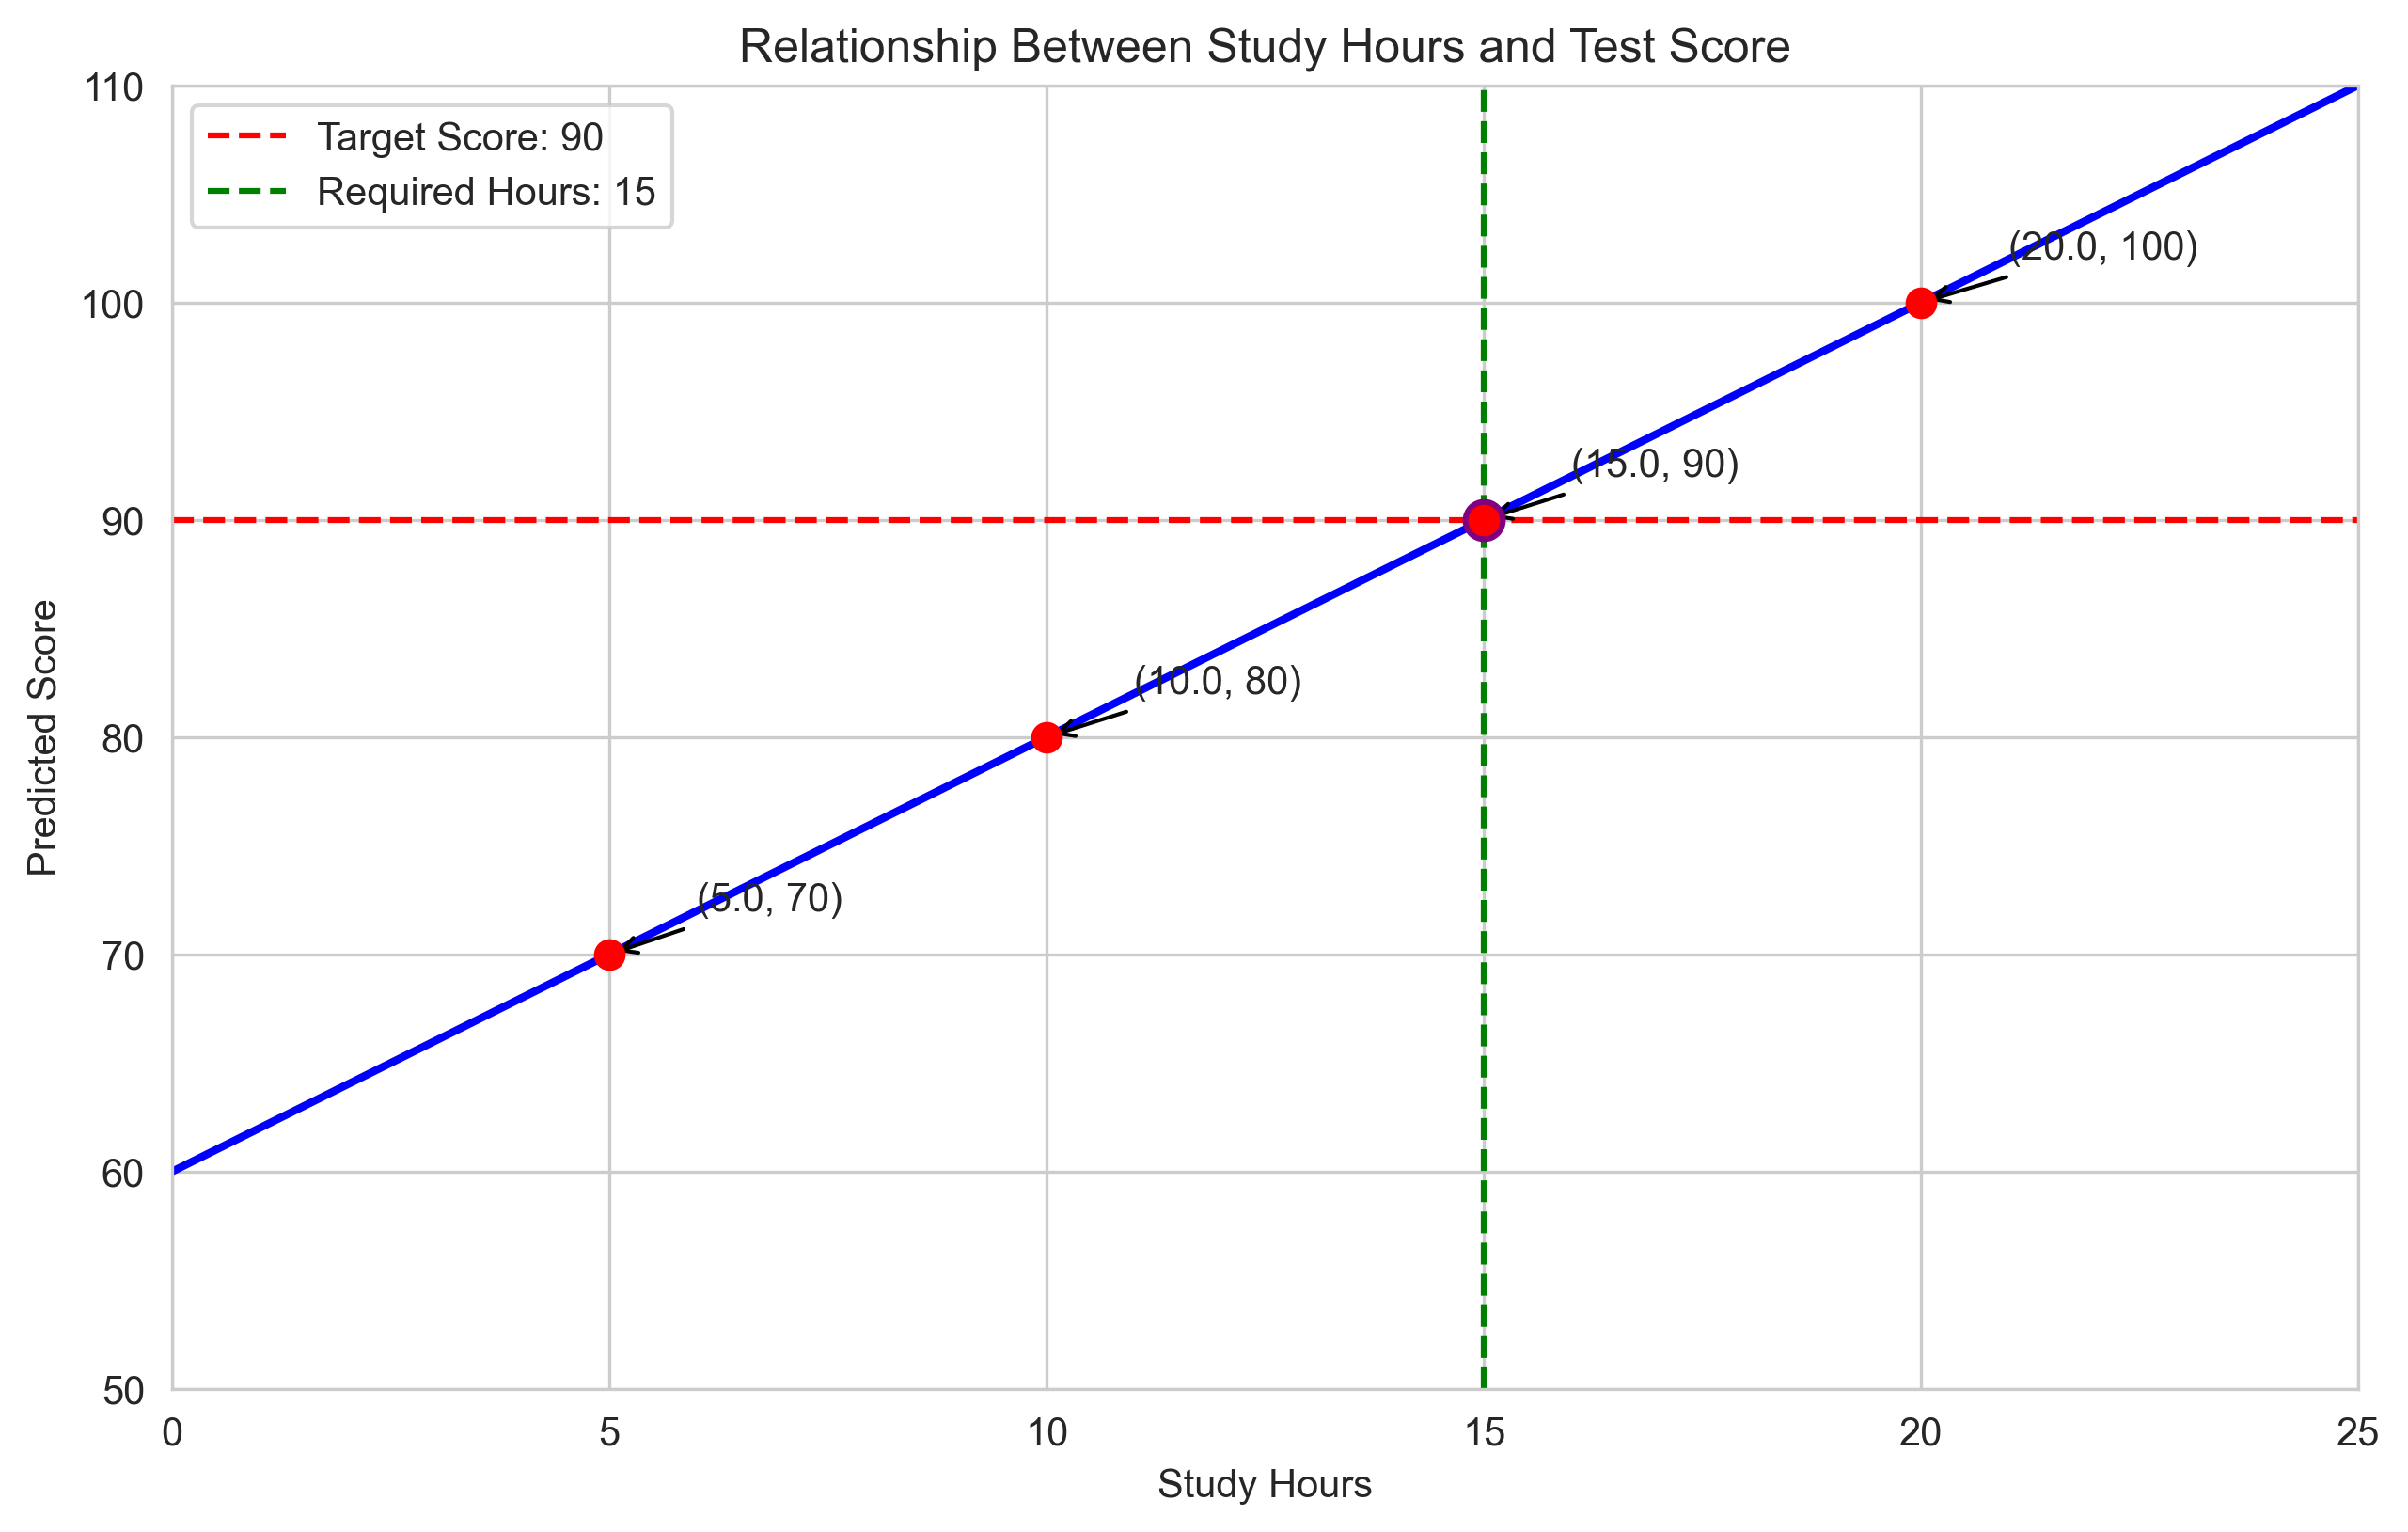

In [8]:
# Create data for our plot
hours = np.linspace(0, 25, 100)
scores = 60 + 2 * hours

plt.figure(figsize=(10, 6))
plt.plot(hours, scores, 'b-', linewidth=2)
plt.axhline(y=90, color='r', linestyle='--', label='Target Score: 90')
plt.axvline(x=15, color='g', linestyle='--', label='Required Hours: 15')
plt.scatter([15], [90], color='purple', s=100, zorder=5)

plt.title('Relationship Between Study Hours and Test Score')
plt.xlabel('Study Hours')
plt.ylabel('Predicted Score')
plt.grid(True)
plt.legend()
plt.xlim(0, 25)
plt.ylim(50, 110)

# Add annotations
for score, hour in zip(target_scores, required_hours):
    plt.scatter([hour], [score], color='red', s=50, zorder=5)
    plt.annotate(f"({hour}, {score})", 
                 xy=(hour, score), 
                 xytext=(hour+1, score+2),
                 arrowprops=dict(arrowstyle="->", color='black'))

plt.show()

## Linear Equations and Relationships

A linear equation has the form $y = mx + b$, where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $m$ is the slope (rate of change)
- $b$ is the y-intercept (value of $y$ when $x = 0$)

In psychology, linear equations are often used to model relationships between variables. For example:
- How reaction time changes with age
- How performance relates to practice
- How memory recall decreases over time

Let's explore a psychological example: the relationship between stress level and performance, known as the Yerkes-Dodson law.

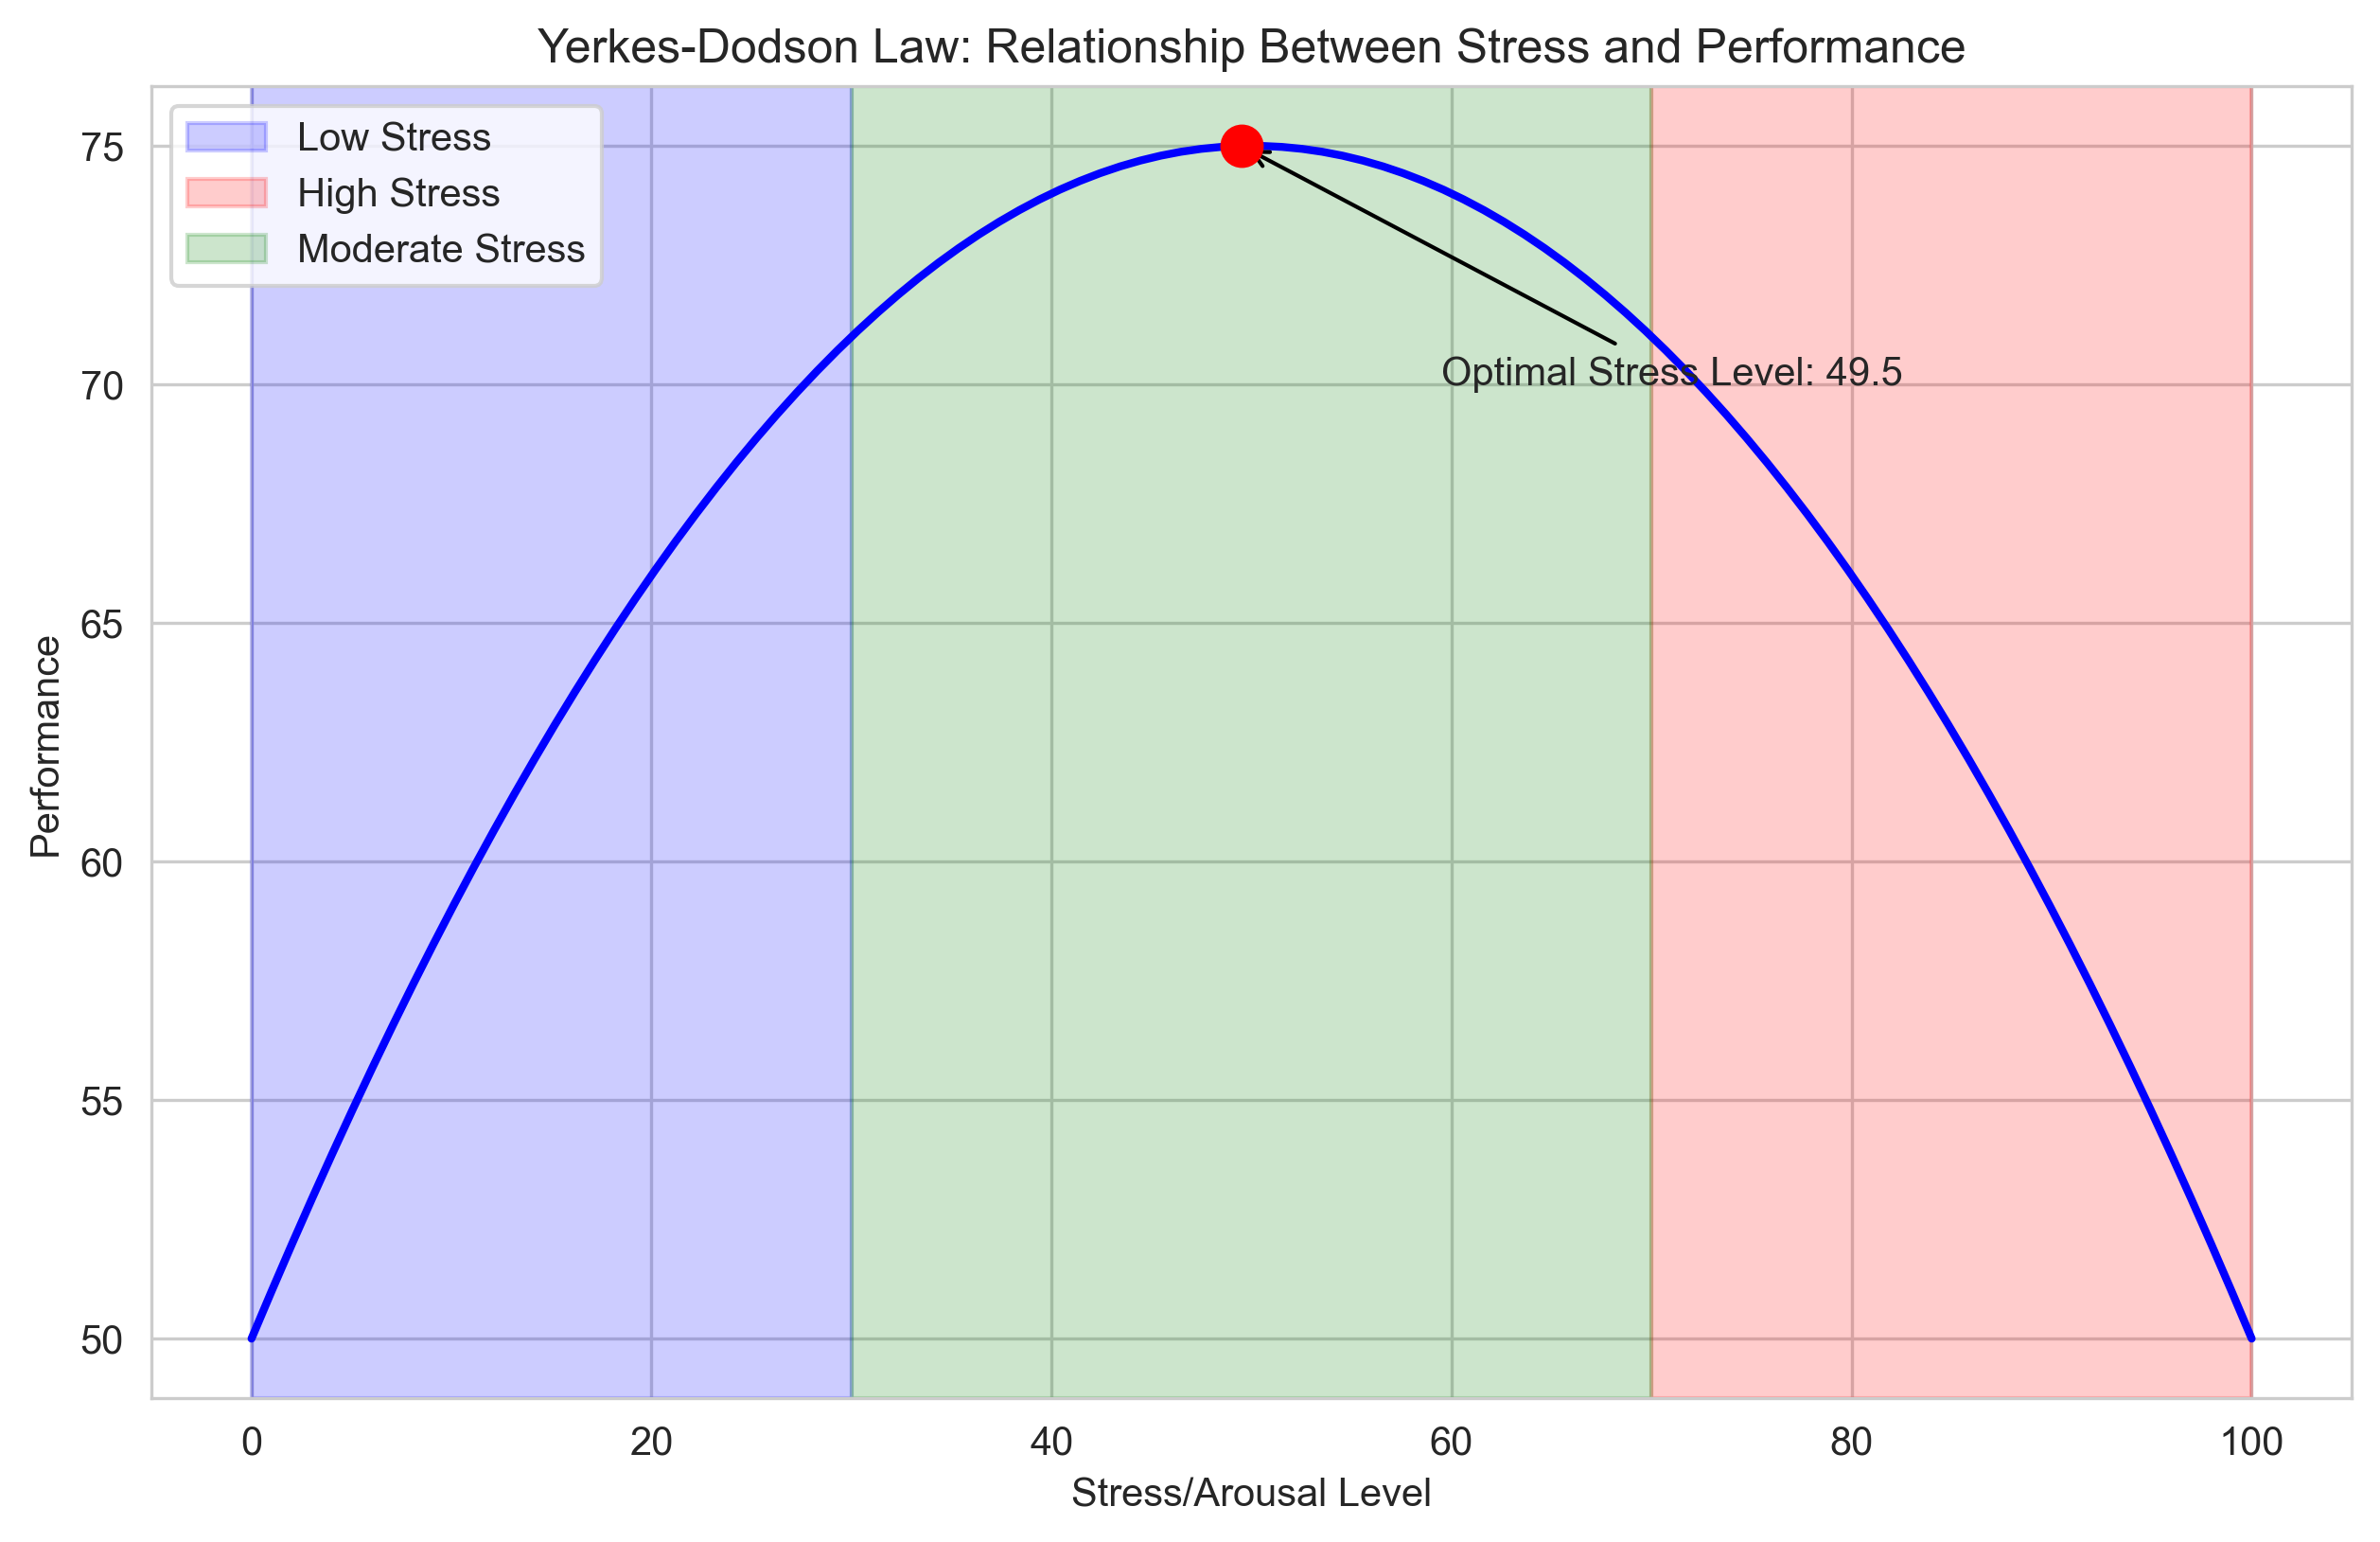

In [9]:
# The Yerkes-Dodson law suggests an inverted U-shaped relationship
# between arousal/stress and performance
# We'll model this with a quadratic equation: Performance = -0.01*stress^2 + stress + 50

stress_levels = np.linspace(0, 100, 100)
performance = -0.01 * stress_levels**2 + stress_levels + 50

plt.figure(figsize=(10, 6))
plt.plot(stress_levels, performance, 'b-', linewidth=2)
plt.title('Yerkes-Dodson Law: Relationship Between Stress and Performance')
plt.xlabel('Stress/Arousal Level')
plt.ylabel('Performance')
plt.grid(True)

# Find the optimal stress level (where performance is maximized)
optimal_stress = stress_levels[np.argmax(performance)]
max_performance = np.max(performance)

plt.scatter([optimal_stress], [max_performance], color='red', s=100, zorder=5)
plt.annotate(f"Optimal Stress Level: {optimal_stress:.1f}", 
             xy=(optimal_stress, max_performance), 
             xytext=(optimal_stress+10, max_performance-5),
             arrowprops=dict(arrowstyle="->", color='black'))

# Highlight low and high stress regions
plt.axvspan(0, 30, alpha=0.2, color='blue', label='Low Stress')
plt.axvspan(70, 100, alpha=0.2, color='red', label='High Stress')
plt.axvspan(30, 70, alpha=0.2, color='green', label='Moderate Stress')

plt.legend()
plt.show()

### Finding the Optimal Value Algebraically

We can use algebra to find the optimal stress level that maximizes performance. For a quadratic function $f(x) = ax^2 + bx + c$, the maximum (or minimum) occurs at $x = -\frac{b}{2a}$.

In our case, $f(\text{stress}) = -0.01 \times \text{stress}^2 + \text{stress} + 50$, so $a = -0.01$ and $b = 1$.

In [10]:
# Define the coefficients
a = -0.01
b = 1
c = 50

# Calculate the optimal stress level
optimal_stress_algebraic = -b / (2*a)
max_performance_algebraic = a * optimal_stress_algebraic**2 + b * optimal_stress_algebraic + c

print(f"Using algebra, the optimal stress level is {optimal_stress_algebraic}")
print(f"At this stress level, the maximum performance is {max_performance_algebraic}")

# Let's verify this matches our numerical result
print(f"\nComparison with numerical result:")
print(f"Numerical optimal stress: {optimal_stress:.1f}")
print(f"Algebraic optimal stress: {optimal_stress_algebraic}")

Using algebra, the optimal stress level is 50.0
At this stress level, the maximum performance is 75.0

Comparison with numerical result:
Numerical optimal stress: 49.5
Algebraic optimal stress: 50.0


## Systems of Equations

A system of equations consists of two or more equations with multiple variables. Solving a system means finding values for the variables that satisfy all equations simultaneously.

In psychology, systems of equations might be used to:
- Model complex relationships between multiple variables
- Analyze data from experiments with multiple conditions
- Solve problems with multiple constraints

Let's solve a system of equations using Python:

In [11]:
from sympy import symbols, solve, Eq

# Define our variables
x, y = symbols('x y')

# Define the system of equations
eq1 = Eq(2*x + y, 7)
eq2 = Eq(x - y, 1)

# Solve the system
solution = solve((eq1, eq2), (x, y))
print(f"Solution: x = {solution[x]}, y = {solution[y]}")

# Verify the solution
print(f"\nVerifying solution:")
print(f"Equation 1: 2({solution[x]}) + {solution[y]} = {2*solution[x] + solution[y]}")
print(f"Equation 2: {solution[x]} - {solution[y]} = {solution[x] - solution[y]}")

Solution: x = 8/3, y = 5/3

Verifying solution:
Equation 1: 2(8/3) + 5/3 = 7
Equation 2: 8/3 - 5/3 = 1


### Psychological Example: Analyzing Experimental Results

Let's consider a psychological experiment with two conditions (A and B) and two groups of participants (Group 1 and Group 2). We have the following information:

- Group 1 participants spent 3 hours in Condition A and 2 hours in Condition B, and showed a total improvement of 13 points.
- Group 2 participants spent 2 hours in Condition A and 4 hours in Condition B, and showed a total improvement of 16 points.

We want to determine the effectiveness (points per hour) of each condition.

In [12]:
# Define variables for effectiveness per hour
a, b = symbols('a b')  # a = effectiveness of Condition A, b = effectiveness of Condition B

# Define the system of equations
eq1 = Eq(3*a + 2*b, 13)  # Group 1: 3 hours in A, 2 hours in B, 13 points improvement
eq2 = Eq(2*a + 4*b, 16)  # Group 2: 2 hours in A, 4 hours in B, 16 points improvement

# Solve the system
solution = solve((eq1, eq2), (a, b))
print(f"Effectiveness of Condition A: {solution[a]} points per hour")
print(f"Effectiveness of Condition B: {solution[b]} points per hour")

# Verify the solution
print(f"\nVerifying solution:")
print(f"Group 1: 3({solution[a]}) + 2({solution[b]}) = {3*solution[a] + 2*solution[b]}")
print(f"Group 2: 2({solution[a]}) + 4({solution[b]}) = {2*solution[a] + 4*solution[b]}")

Effectiveness of Condition A: 5/2 points per hour
Effectiveness of Condition B: 11/4 points per hour

Verifying solution:
Group 1: 3(5/2) + 2(11/4) = 13
Group 2: 2(5/2) + 4(11/4) = 16


Let's visualize this system of equations:

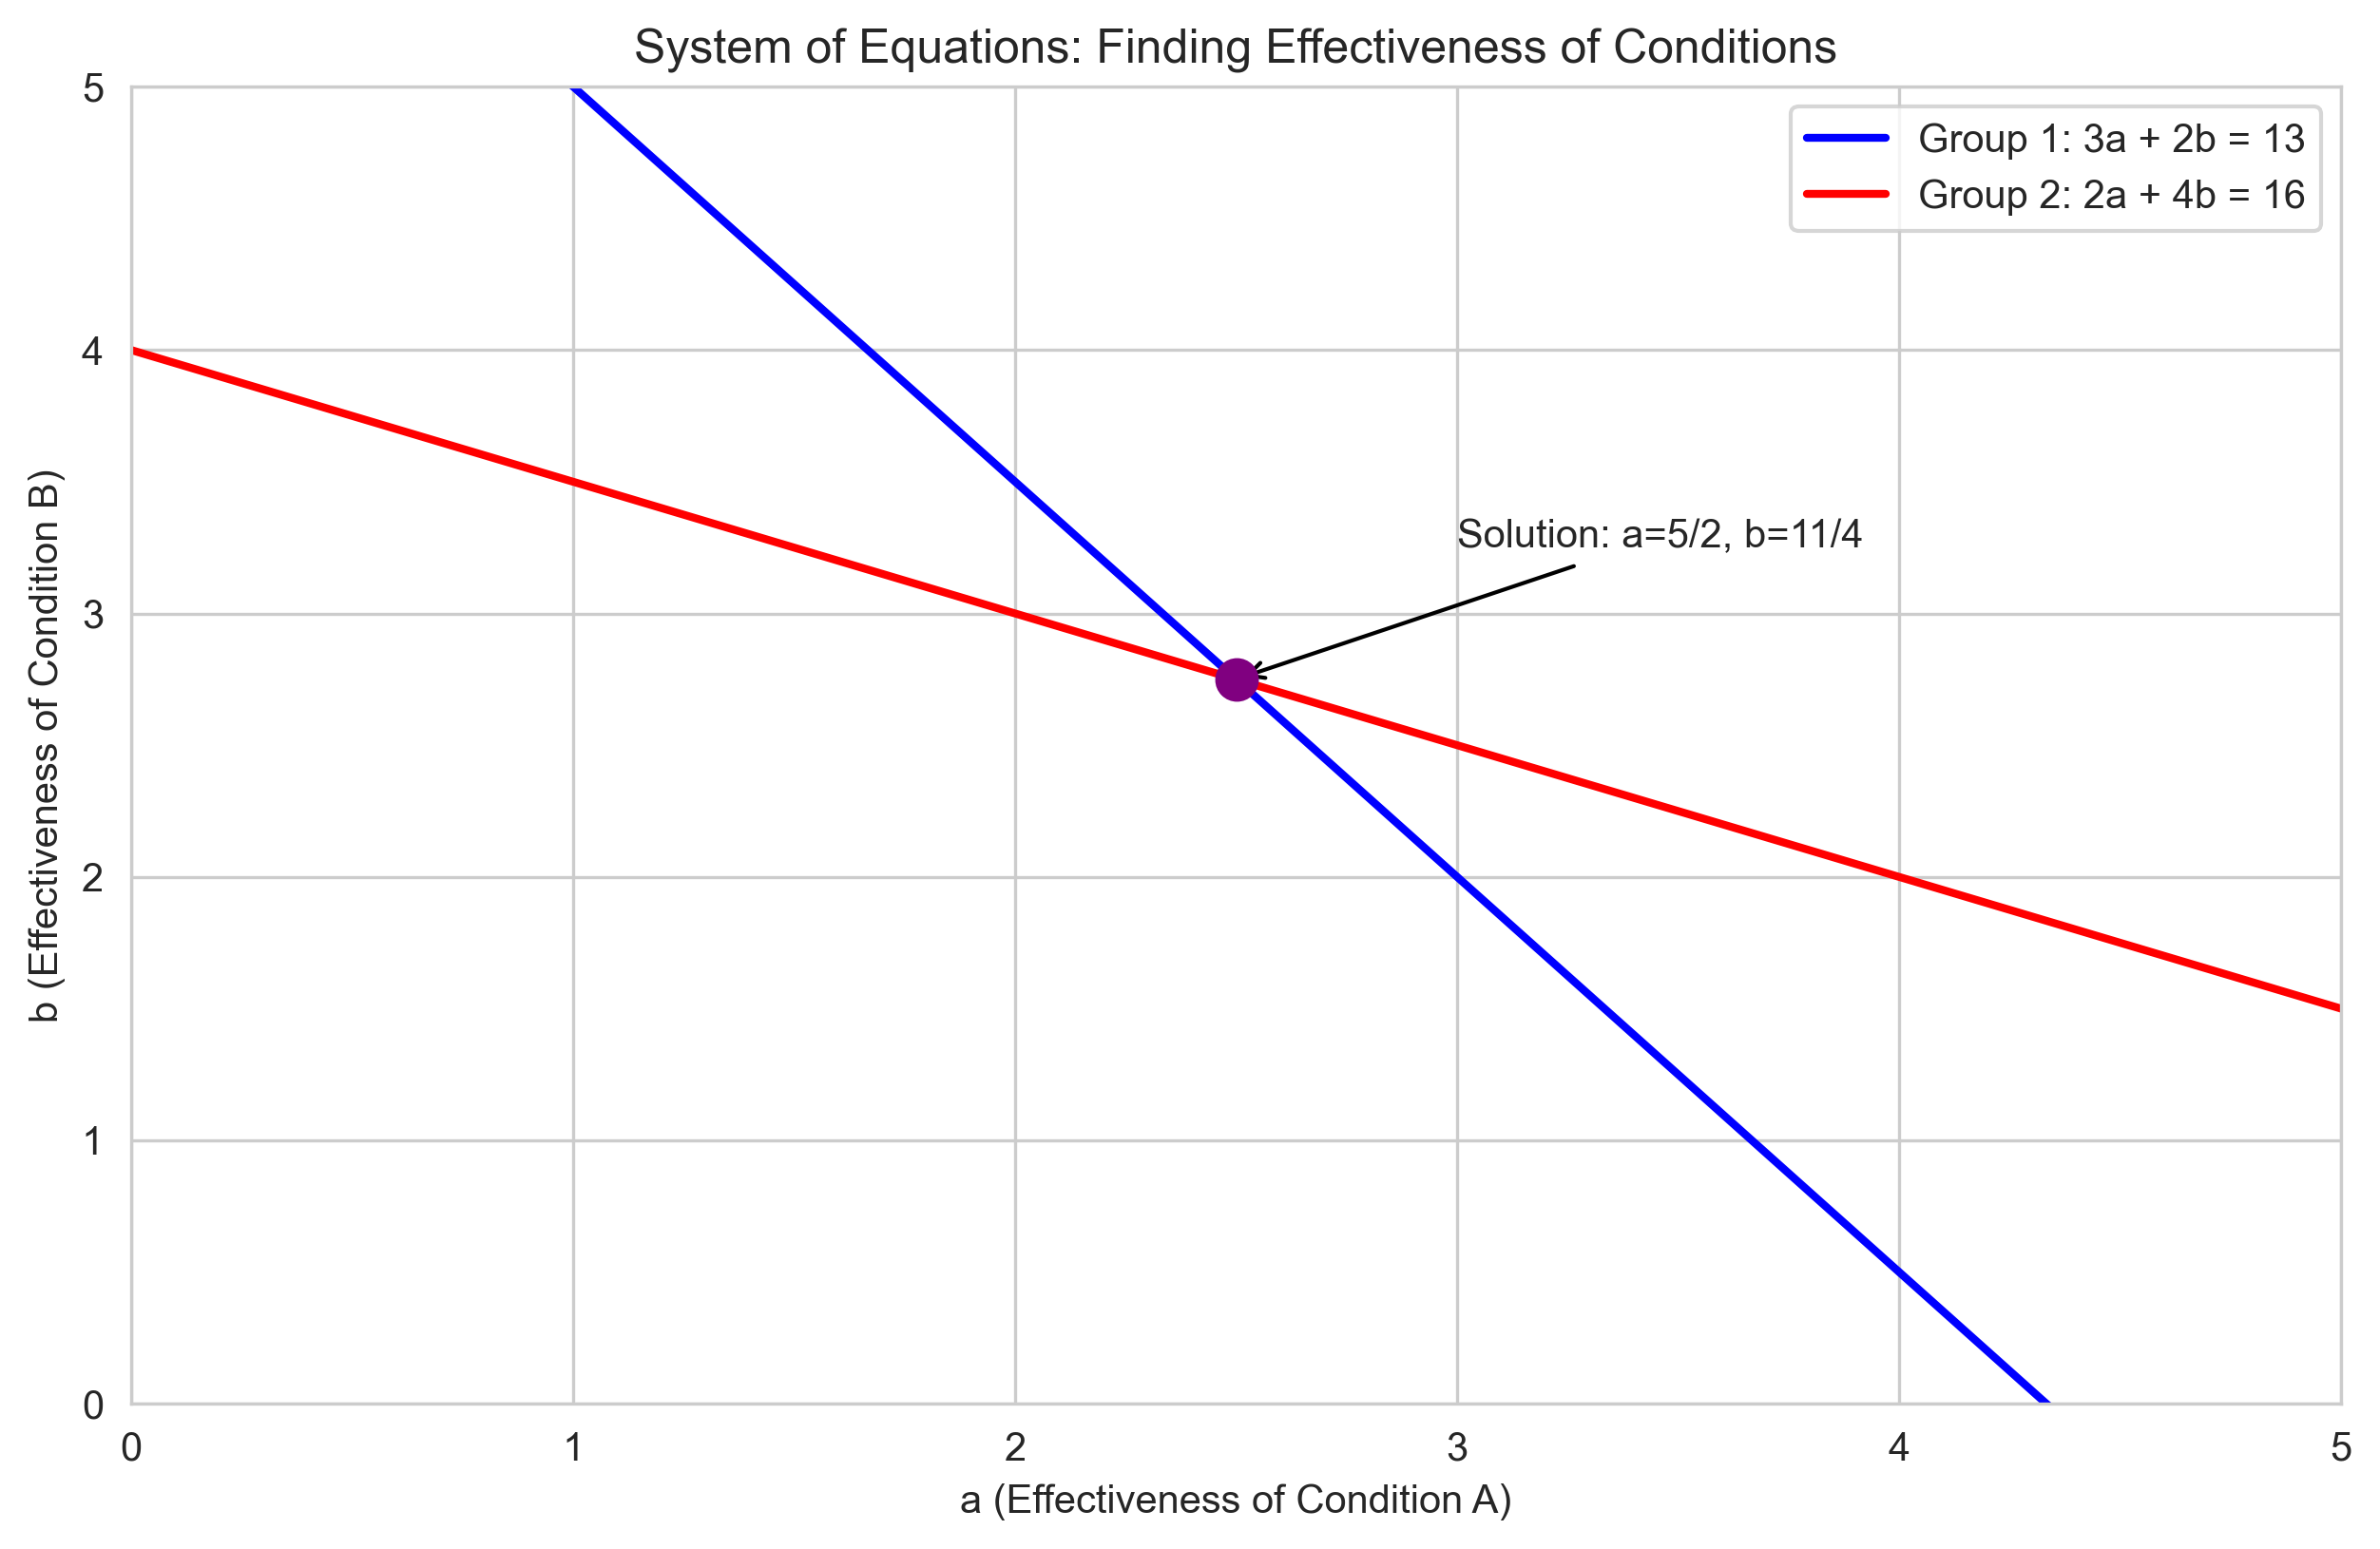

In [13]:
# Create a range of values for a
a_values = np.linspace(0, 5, 100)

# Calculate corresponding b values for each equation
b_values_eq1 = (13 - 3*a_values) / 2  # From 3a + 2b = 13
b_values_eq2 = (16 - 2*a_values) / 4  # From 2a + 4b = 16

plt.figure(figsize=(10, 6))
plt.plot(a_values, b_values_eq1, 'b-', linewidth=2, label='Group 1: 3a + 2b = 13')
plt.plot(a_values, b_values_eq2, 'r-', linewidth=2, label='Group 2: 2a + 4b = 16')

# Mark the solution point
plt.scatter([solution[a]], [solution[b]], color='purple', s=100, zorder=5)
plt.annotate(f"Solution: a={solution[a]}, b={solution[b]}", 
             xy=(solution[a], solution[b]), 
             xytext=(solution[a]+0.5, solution[b]+0.5),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.title('System of Equations: Finding Effectiveness of Conditions')
plt.xlabel('a (Effectiveness of Condition A)')
plt.ylabel('b (Effectiveness of Condition B)')
plt.grid(True)
plt.legend()
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

## Algebraic Modeling in Psychology

Let's explore a more complex psychological example: modeling the forgetting curve. According to Ebbinghaus's forgetting curve, memory retention decreases exponentially over time.

The basic formula is:

$$R = e^{-t/S}$$

Where:
- $R$ is the retention (percentage of information remembered)
- $t$ is the time since learning
- $S$ is the strength of memory (affected by factors like meaningfulness, repetition, etc.)
- $e$ is the base of the natural logarithm (approximately 2.71828)

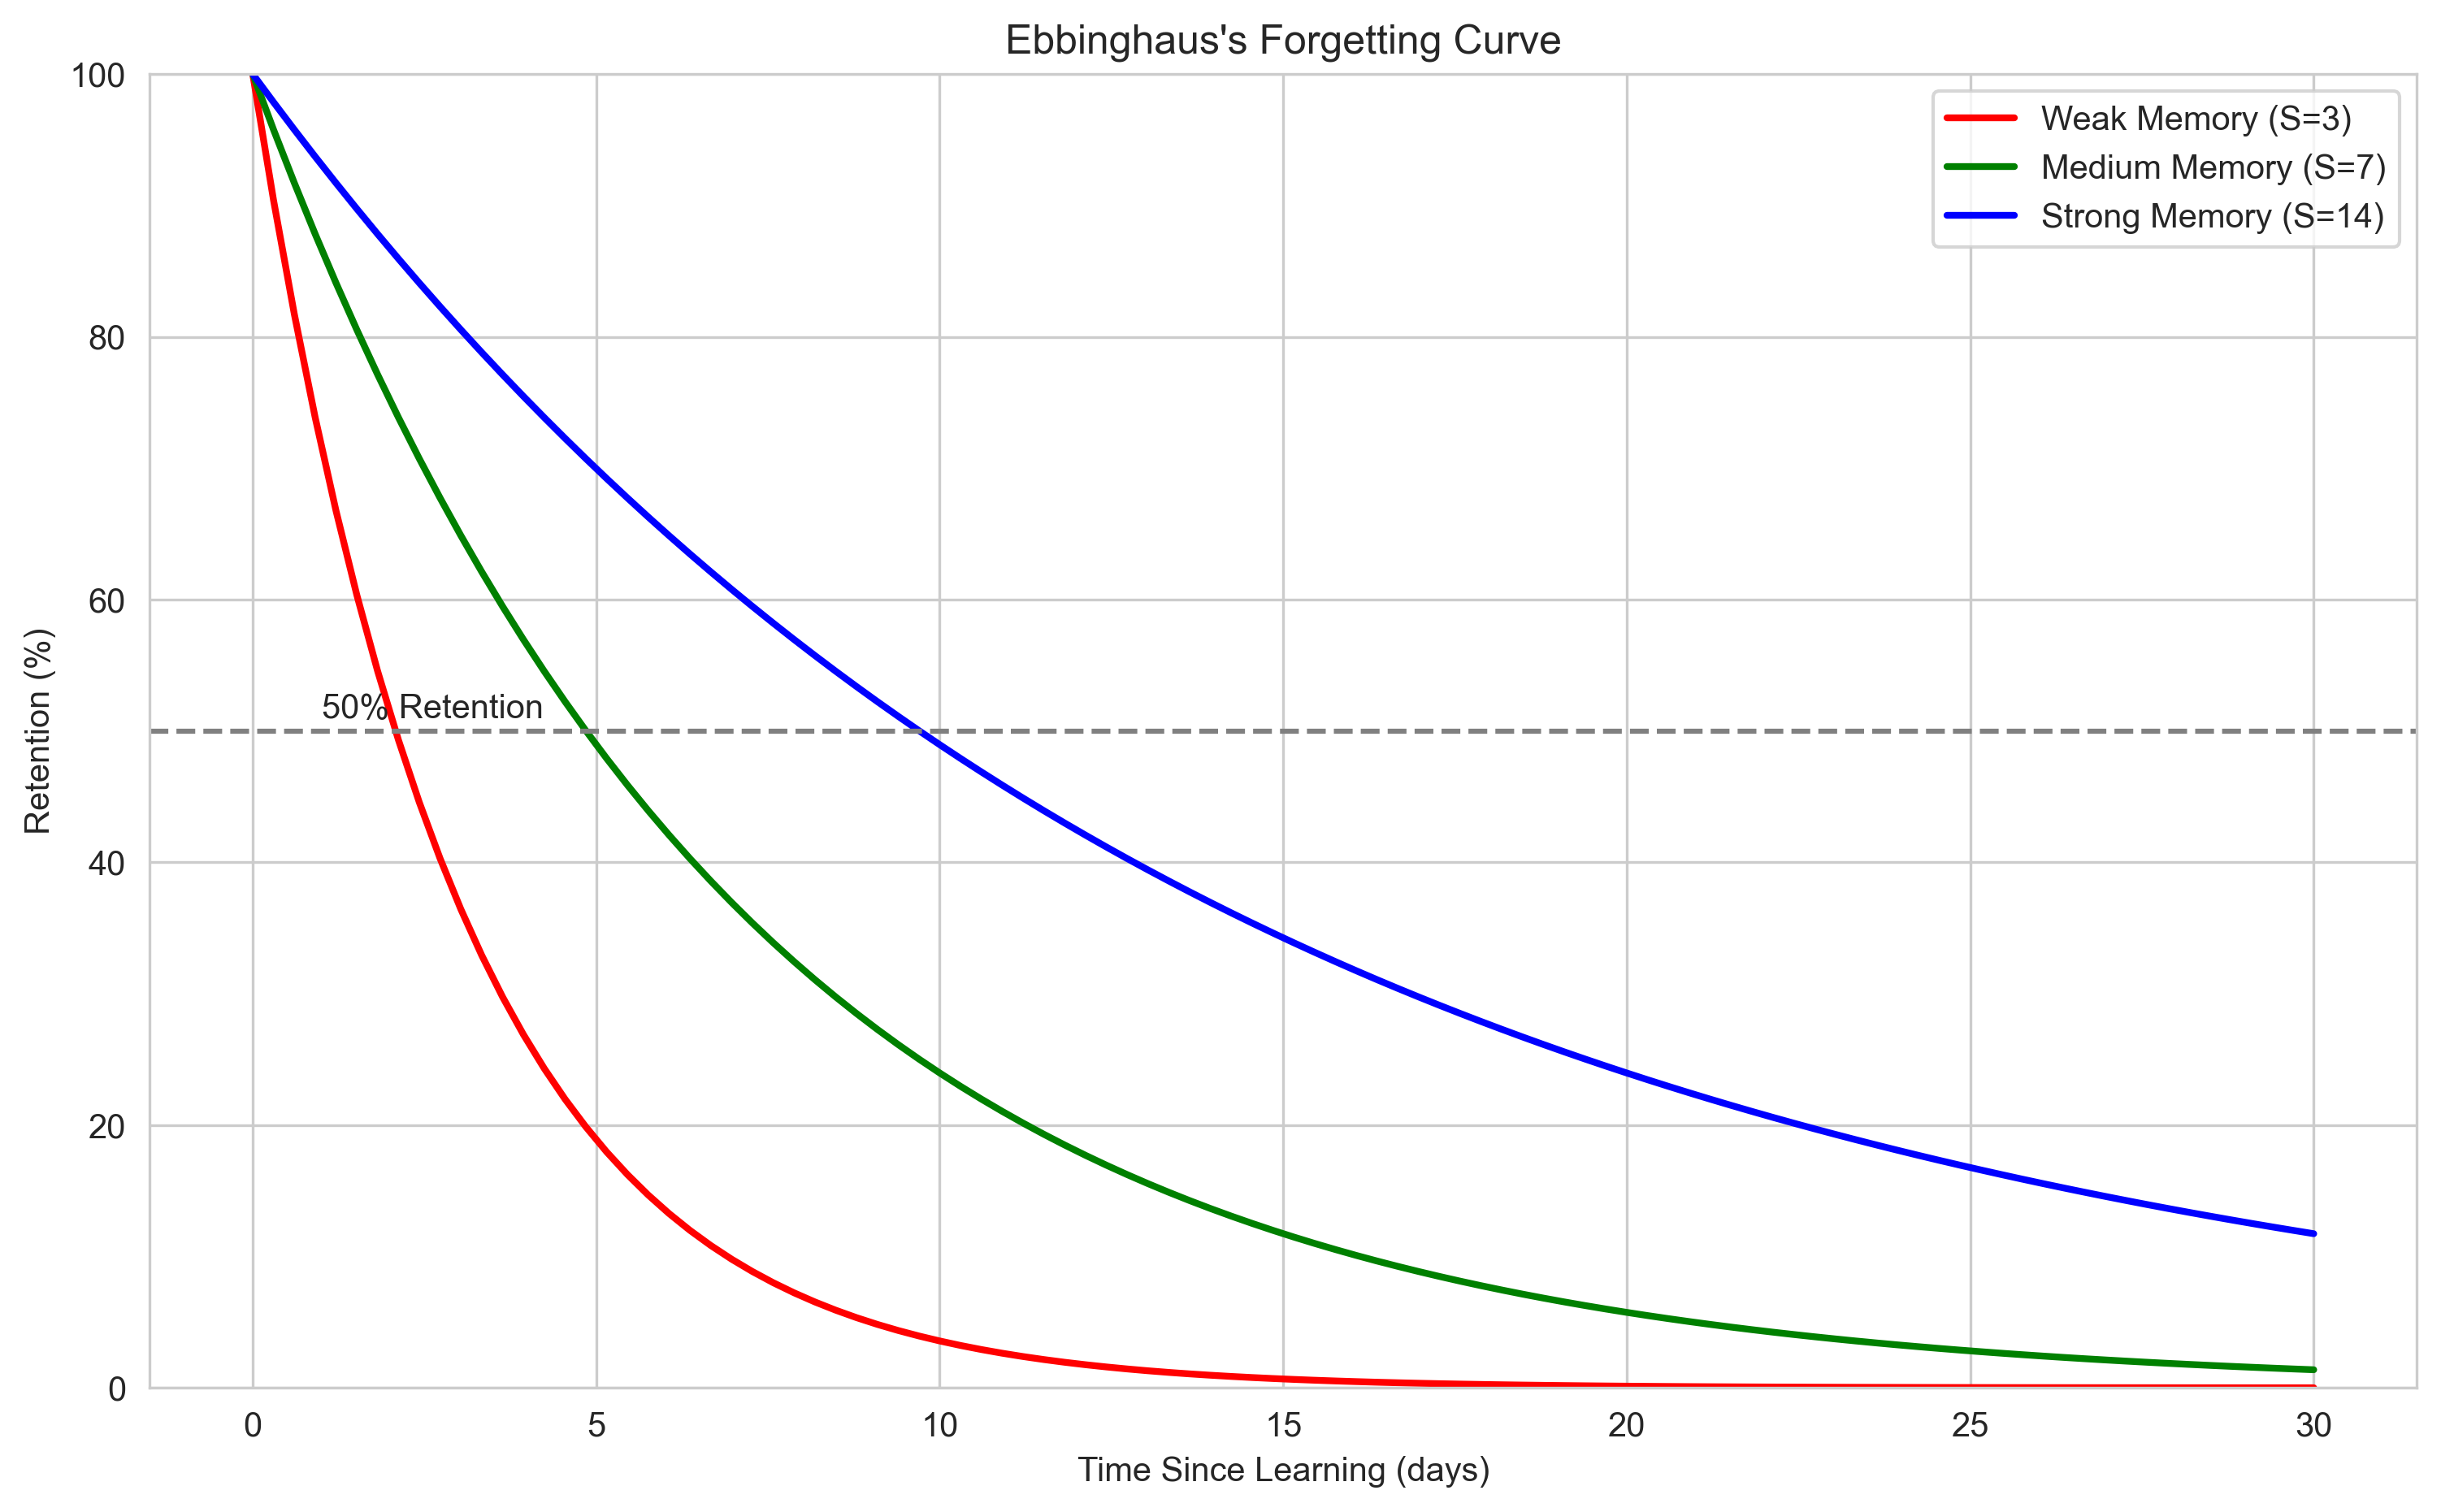

In [14]:
# Define a function for the forgetting curve
def forgetting_curve(time, strength):
    """Calculate memory retention based on the forgetting curve.
    
    Args:
        time: Time since learning (in days)
        strength: Strength of memory
        
    Returns:
        Retention (percentage of information remembered)
    """
    return 100 * np.exp(-time / strength)

# Create data for different memory strengths
time_days = np.linspace(0, 30, 100)
retention_weak = forgetting_curve(time_days, 3)    # Weak memory
retention_medium = forgetting_curve(time_days, 7)  # Medium memory
retention_strong = forgetting_curve(time_days, 14) # Strong memory

plt.figure(figsize=(12, 7))
plt.plot(time_days, retention_weak, 'r-', linewidth=2, label='Weak Memory (S=3)')
plt.plot(time_days, retention_medium, 'g-', linewidth=2, label='Medium Memory (S=7)')
plt.plot(time_days, retention_strong, 'b-', linewidth=2, label='Strong Memory (S=14)')

plt.title("Ebbinghaus's Forgetting Curve")
plt.xlabel('Time Since Learning (days)')
plt.ylabel('Retention (%)')
plt.grid(True)
plt.legend()
plt.ylim(0, 100)

# Add a horizontal line at 50% retention
plt.axhline(y=50, color='gray', linestyle='--')
plt.text(1, 51, '50% Retention', fontsize=10)

plt.show()

### Solving for Unknown Variables in the Forgetting Curve

Let's use algebra to answer some questions about the forgetting curve:

1. How long will it take for retention to drop to 50% with different memory strengths?
2. What memory strength is needed to maintain 70% retention after 10 days?

In [15]:
import math

# Question 1: How long will it take for retention to drop to 50%?
# We need to solve: 50 = 100 * e^(-t/S) for t
# This simplifies to: 0.5 = e^(-t/S)
# Taking natural log of both sides: ln(0.5) = -t/S
# Therefore: t = -S * ln(0.5)

def time_to_retention(retention_percent, strength):
    """Calculate time needed to reach a specific retention level."""
    retention_fraction = retention_percent / 100
    return -strength * math.log(retention_fraction)

# Calculate for different memory strengths
memory_strengths = [3, 7, 14]  # Weak, medium, strong
target_retention = 50  # 50%

print("Time to reach 50% retention:")
for strength in memory_strengths:
    days = time_to_retention(target_retention, strength)
    print(f"  Memory strength {strength}: {days:.1f} days")

# Question 2: What memory strength is needed for 70% retention after 10 days?
# We need to solve: 70 = 100 * e^(-10/S) for S
# This simplifies to: 0.7 = e^(-10/S)
# Taking natural log: ln(0.7) = -10/S
# Therefore: S = -10 / ln(0.7)

def strength_for_retention(retention_percent, time):
    """Calculate memory strength needed for a specific retention after given time."""
    retention_fraction = retention_percent / 100
    return -time / math.log(retention_fraction)

target_days = 10
target_retention = 70  # 70%

required_strength = strength_for_retention(target_retention, target_days)
print(f"\nTo maintain {target_retention}% retention after {target_days} days,")
print(f"a memory strength of {required_strength:.1f} is required.")

Time to reach 50% retention:
  Memory strength 3: 2.1 days
  Memory strength 7: 4.9 days
  Memory strength 14: 9.7 days

To maintain 70% retention after 10 days,
a memory strength of 28.0 is required.


## Algebraic Manipulation

Algebraic manipulation involves rearranging equations to isolate different variables or to simplify
## Algebraic Manipulation

Algebraic manipulation involves rearranging equations to isolate different variables or to simplify expressions. This is a crucial skill in psychology research when working with formulas and models.

Common manipulations include:
1. Isolating variables
2. Combining like terms
3. Factoring expressions
4. Simplifying complex expressions

Let's practice with some examples relevant to psychology:

In [16]:
from sympy import symbols, expand, factor, simplify, solve

# Example 1: Rearranging the formula for correlation coefficient
# r = cov(X,Y) / (σX * σY)
# Solve for cov(X,Y)

r, cov_xy, sigma_x, sigma_y = symbols('r cov_xy sigma_x sigma_y')
equation = r - cov_xy / (sigma_x * sigma_y)
solved = solve(equation, cov_xy)

print("Original equation: r = cov(X,Y) / (σX * σY)")
print(f"Solved for cov(X,Y): cov(X,Y) = {solved[0]}")

# Example 2: Expanding an expression
x, y = symbols('x y')
expression = (x + 2*y)**2
expanded = expand(expression)

print(f"\nOriginal expression: (x + 2y)²")
print(f"Expanded: {expanded}")

# Example 3: Factoring an expression
expression2 = x**2 - 4*y**2
factored = factor(expression2)

print(f"\nOriginal expression: x² - 4y²")
print(f"Factored: {factored}")

Original equation: r = cov(X,Y) / (σX * σY)
Solved for cov(X,Y): cov(X,Y) = r*sigma_x*sigma_y

Original expression: (x + 2y)²
Expanded: x**2 + 4*x*y + 4*y**2

Original expression: x² - 4y²
Factored: (x - 2*y)*(x + 2*y)


### Psychological Example: Signal Detection Theory

Signal Detection Theory (SDT) is used in psychology to analyze how people make decisions under uncertainty. It involves several key measures, including sensitivity (d') and response bias (c).

The formula for d' is:

$$d' = z(\text{Hit Rate}) - z(\text{False Alarm Rate})$$

Where $z$ is the z-score (standard normal inverse) function.

Let's manipulate this formula to find the Hit Rate when we know d', False Alarm Rate, and want to achieve a specific sensitivity:

In [17]:
from scipy import stats

# Define a function to calculate d-prime
def calculate_dprime(hit_rate, false_alarm_rate):
    """Calculate sensitivity (d') from hit rate and false alarm rate."""
    # Handle extreme values to avoid infinity
    hit_rate = np.clip(hit_rate, 0.01, 0.99)
    false_alarm_rate = np.clip(false_alarm_rate, 0.01, 0.99)
    
    # Calculate d'
    z_hit = stats.norm.ppf(hit_rate)
    z_fa = stats.norm.ppf(false_alarm_rate)
    return z_hit - z_fa

# Define a function to calculate hit rate from d' and false alarm rate
def calculate_hit_rate(dprime, false_alarm_rate):
    """Calculate hit rate from d' and false alarm rate."""
    # Handle extreme values
    false_alarm_rate = np.clip(false_alarm_rate, 0.01, 0.99)
    
    # Rearranging the formula: d' = z(HR) - z(FAR)
    # Therefore: z(HR) = d' + z(FAR)
    # And: HR = Φ(d' + z(FAR)) where Φ is the cumulative normal distribution
    z_fa = stats.norm.ppf(false_alarm_rate)
    z_hit = dprime + z_fa
    return stats.norm.cdf(z_hit)

# Example: If d' = 2.0 and FAR = 0.2, what is the hit rate?
dprime = 2.0
far = 0.2
hr = calculate_hit_rate(dprime, far)

print(f"If d' = {dprime} and False Alarm Rate = {far}, then Hit Rate = {hr:.3f}")

# Verify our calculation
calculated_dprime = calculate_dprime(hr, far)
print(f"Verification: Using HR = {hr:.3f} and FAR = {far}, we get d' = {calculated_dprime:.3f}")

If d' = 2.0 and False Alarm Rate = 0.2, then Hit Rate = 0.877
Verification: Using HR = 0.877 and FAR = 0.2, we get d' = 2.000


Let's visualize how hit rate changes with different values of d' and false alarm rate:

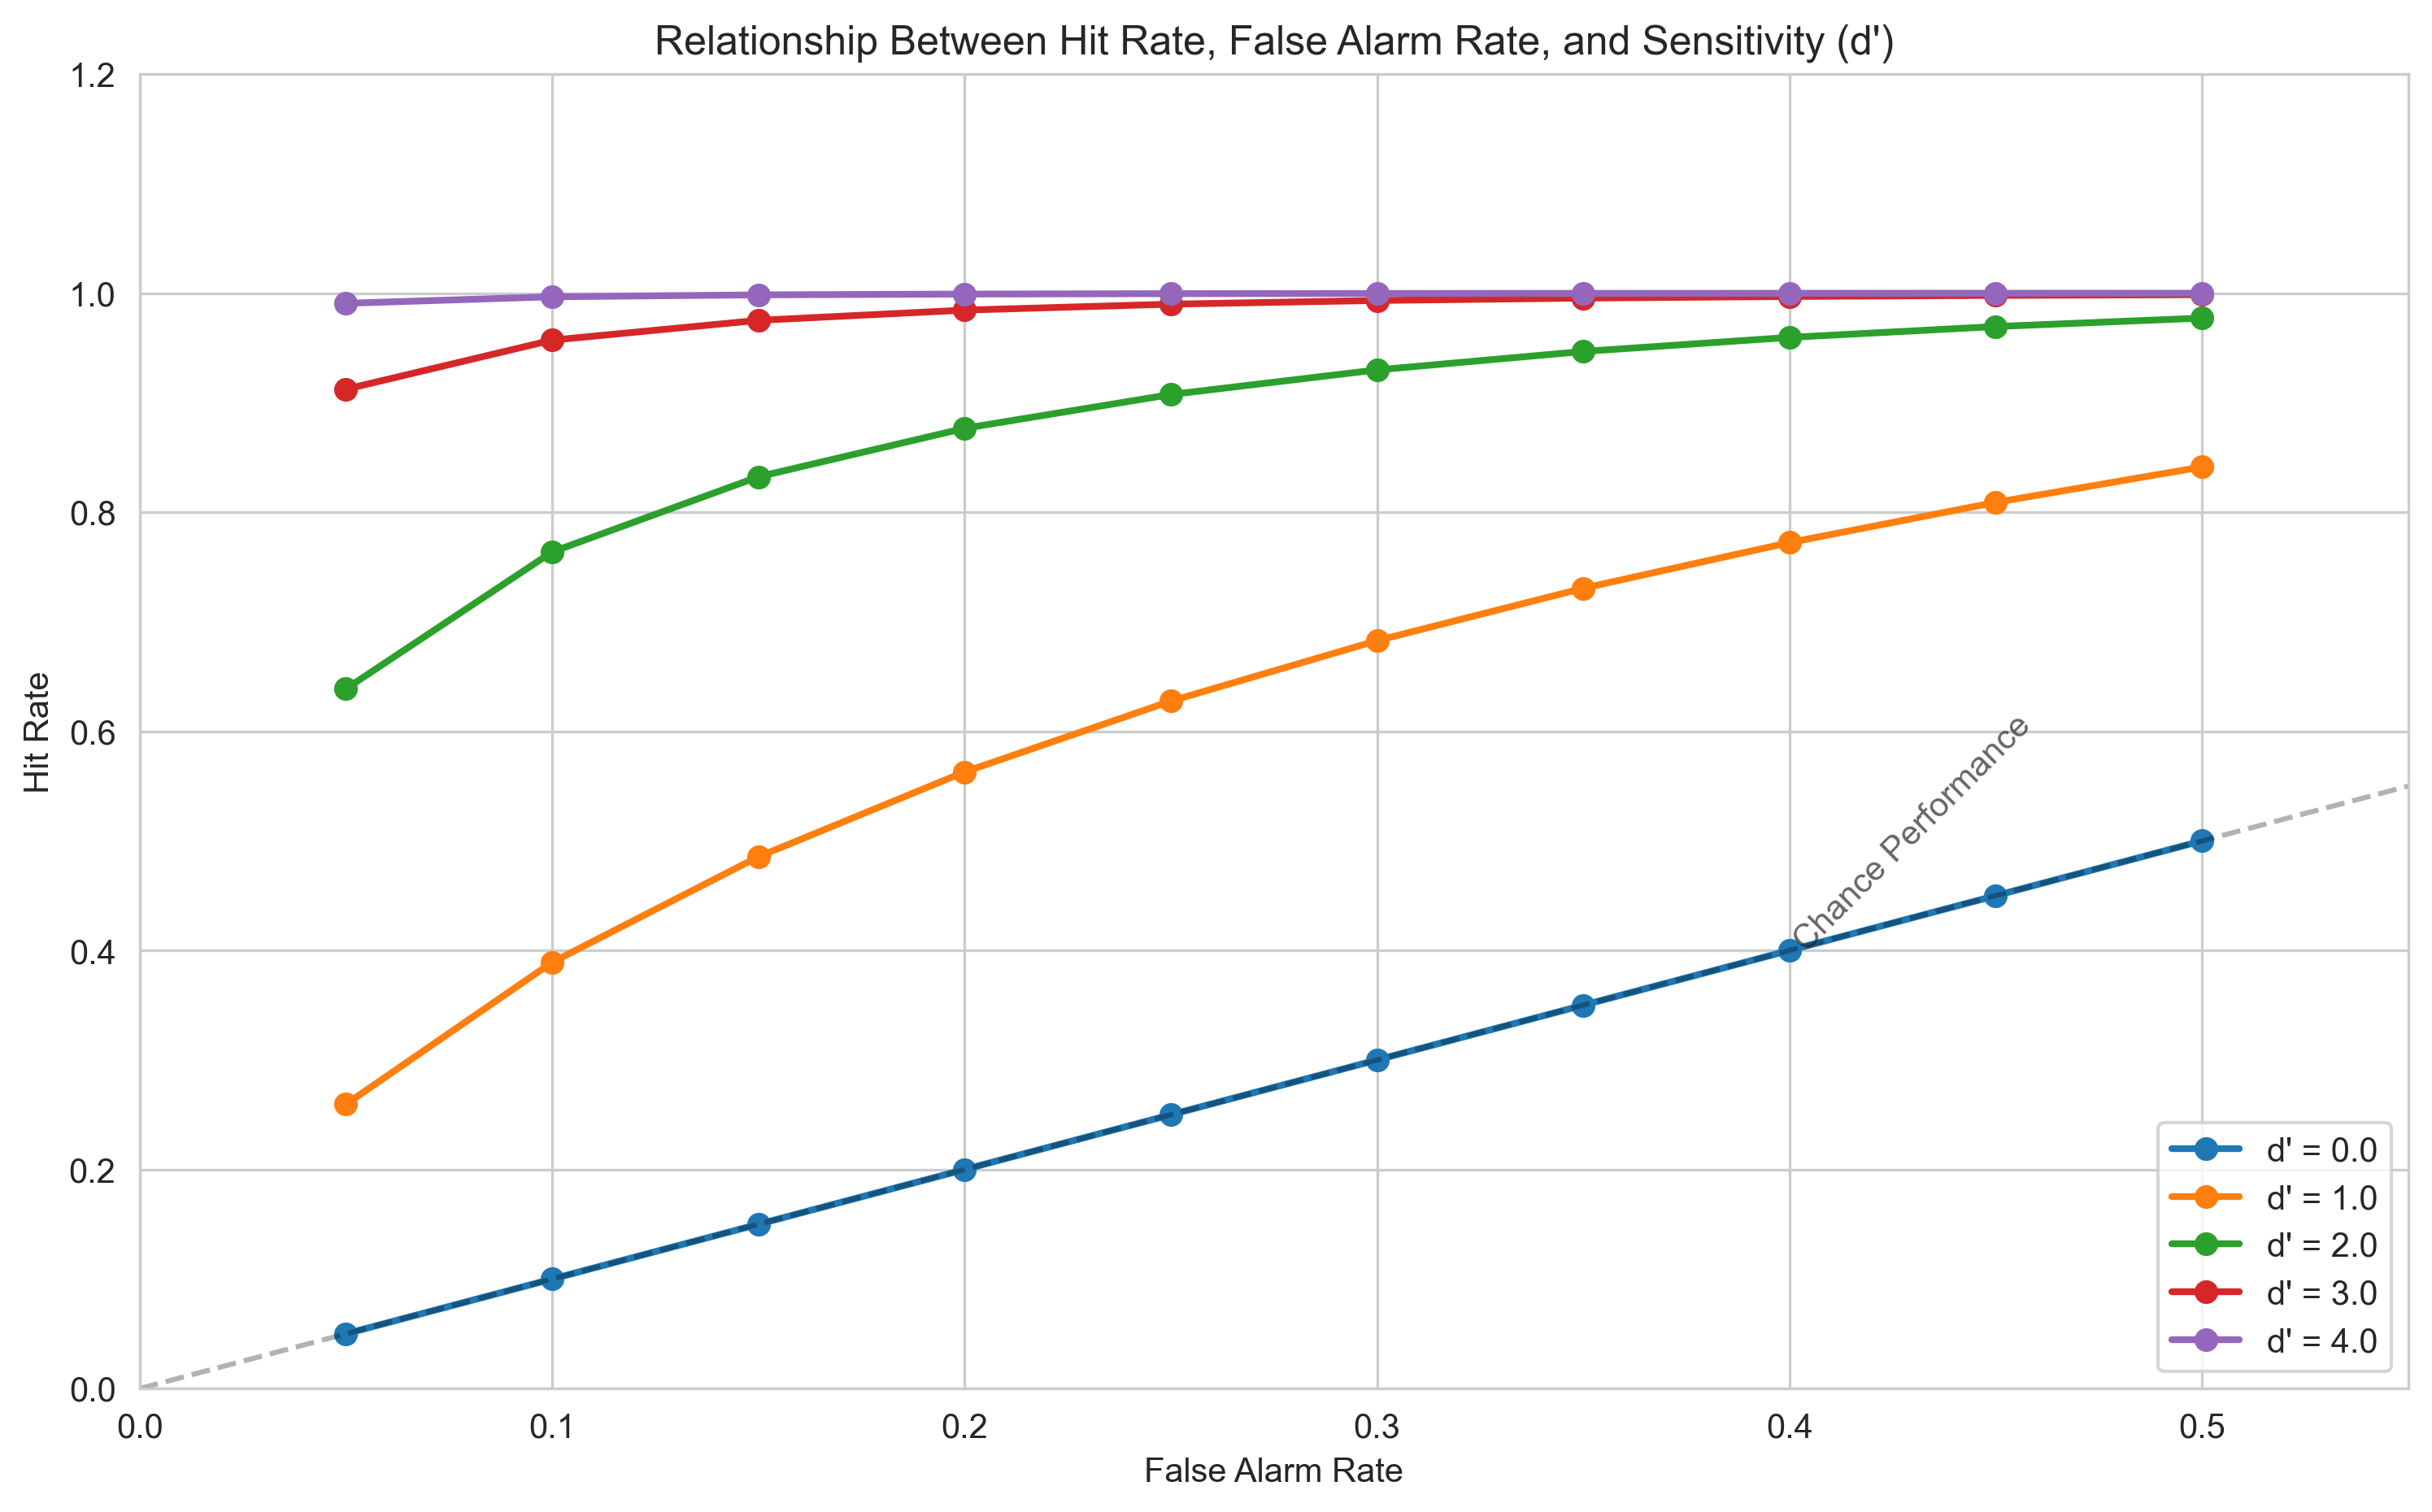

In [18]:
# Create a range of d' values
dprime_values = np.linspace(0, 4, 5)
far_values = np.linspace(0.05, 0.5, 10)

plt.figure(figsize=(12, 7))

for dprime in dprime_values:
    hit_rates = [calculate_hit_rate(dprime, far) for far in far_values]
    plt.plot(far_values, hit_rates, '-o', linewidth=2, label=f"d' = {dprime:.1f}")

plt.title("Relationship Between Hit Rate, False Alarm Rate, and Sensitivity (d')")
plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.grid(True)
plt.legend()
plt.xlim(0, 0.55)
plt.ylim(0, 1.2)

# Add a diagonal line representing chance performance (d' = 0)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.3)
plt.text(0.4, 0.4, "Chance Performance", rotation=45, alpha=0.7)

plt.show()

## Word Problems and Algebraic Thinking

Algebraic thinking is essential for solving word problems in psychology. The process typically involves:

1. Identifying the unknown quantities (variables)
2. Expressing relationships between variables as equations
3. Solving the equations
4. Interpreting the results in context

Let's solve a psychology-related word problem:

**Problem**: A researcher is designing a memory experiment. The experiment consists of a study phase and a test phase. The researcher wants the total experiment to last exactly 60 minutes. The test phase must be twice as long as the study phase, and there needs to be a 10-minute break between phases. How long should each phase be?

**Step 1**: Identify the variables
- Let $s$ = duration of study phase (in minutes)
- Let $t$ = duration of test phase (in minutes)

**Step 2**: Express relationships as equations
- Total time: $s + 10 + t = 60$ (study phase + break + test phase = 60 minutes)
- Relationship between phases: $t = 2s$ (test phase is twice as long as study phase)

**Step 3**: Solve the equations

In [19]:
# Define variables
s, t = symbols('s t')

# Define equations
eq1 = Eq(s + 10 + t, 60)  # Total time equation
eq2 = Eq(t, 2*s)          # Relationship between phases

# Solve the system
solution = solve((eq1, eq2), (s, t))

print(f"Study phase duration: {solution[s]} minutes")
print(f"Test phase duration: {solution[t]} minutes")

# Verify the solution
print(f"\nVerification:")
print(f"Study phase + Break + Test phase = {solution[s]} + 10 + {solution[t]} = {solution[s] + 10 + solution[t]} minutes")
print(f"Test phase = 2 × Study phase: {solution[t]} = 2 × {solution[s]} = {2 * solution[s]}")

Study phase duration: 50/3 minutes
Test phase duration: 100/3 minutes

Verification:
Study phase + Break + Test phase = 50/3 + 10 + 100/3 = 60 minutes
Test phase = 2 × Study phase: 100/3 = 2 × 50/3 = 100/3


**Step 4**: Interpret the results

The study phase should last 16⅔ minutes, and the test phase should last 33⅓ minutes. With the 10-minute break, the total experiment will last exactly 60 minutes as required.

## Algebraic Modeling of Learning

Let's explore another psychological application: modeling the learning curve. The power law of practice states that the time taken to perform a task decreases as a power function of the number of practice trials.

The basic formula is:

$$T = T_1 \times N^{-b}$$

Where:
- $T$ is the time taken to perform the task on the $N$th trial
- $T_1$ is the time taken on the first trial
- $N$ is the trial number
- $b$ is the learning rate (typically between 0.2 and 0.6)

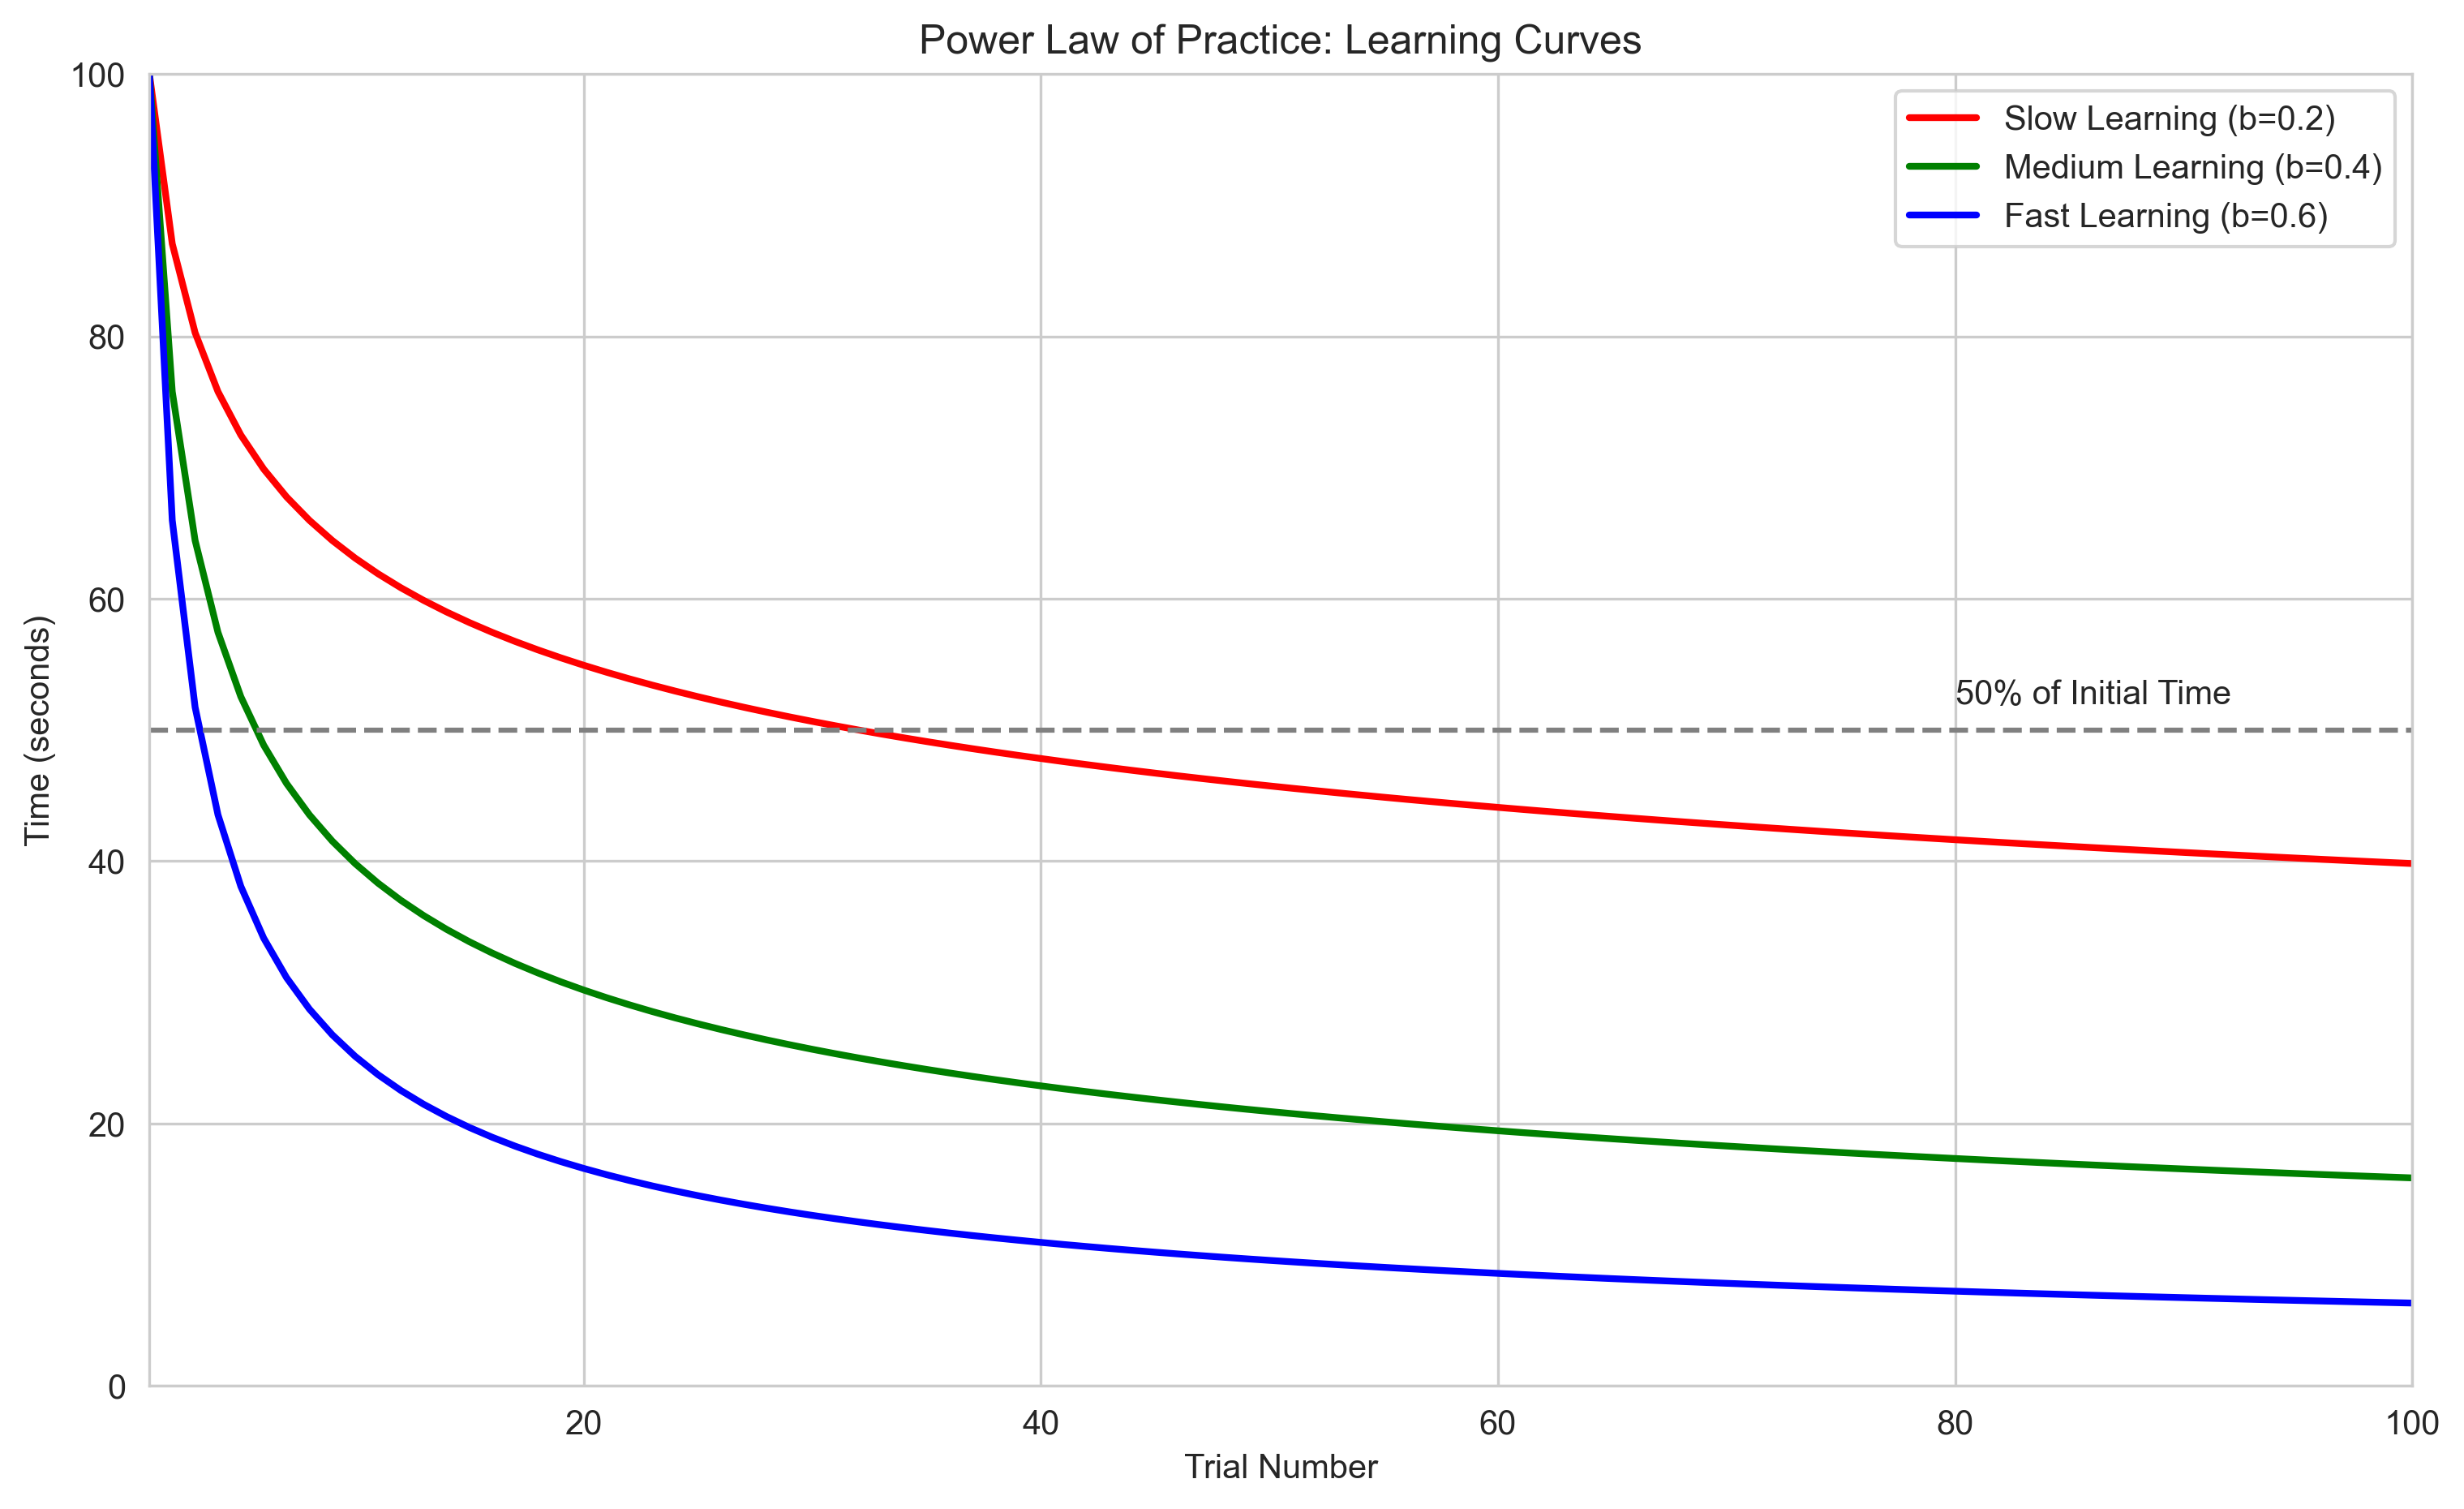

In [20]:
# Define a function for the power law of practice
def power_law_of_practice(initial_time, trial_number, learning_rate):
    """Calculate time taken on a given trial based on the power law of practice."""
    return initial_time * (trial_number ** -learning_rate)

# Create data for different learning rates
trials = np.arange(1, 101)  # Trials 1 to 100
initial_time = 100  # Time (in seconds) for the first trial

# Calculate time for different learning rates
time_slow = power_law_of_practice(initial_time, trials, 0.2)  # Slow learning
time_medium = power_law_of_practice(initial_time, trials, 0.4)  # Medium learning
time_fast = power_law_of_practice(initial_time, trials, 0.6)  # Fast learning

plt.figure(figsize=(12, 7))
plt.plot(trials, time_slow, 'r-', linewidth=2, label='Slow Learning (b=0.2)')
plt.plot(trials, time_medium, 'g-', linewidth=2, label='Medium Learning (b=0.4)')
plt.plot(trials, time_fast, 'b-', linewidth=2, label='Fast Learning (b=0.6)')

plt.title("Power Law of Practice: Learning Curves")
plt.xlabel('Trial Number')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.xlim(1, 100)
plt.ylim(0, 100)

# Add a horizontal line at 50% of initial time
plt.axhline(y=initial_time/2, color='gray', linestyle='--')
plt.text(80, initial_time/2 + 2, '50% of Initial Time', fontsize=10)

plt.show()

### Solving for Unknown Variables in the Learning Curve

Let's use algebra to answer some questions about the learning curve:

1. How many trials are needed to reduce the time to 50% of the initial time?
2. What learning rate is needed to reach 25% of the initial time after 20 trials?

In [21]:
import math

# Question 1: How many trials to reach 50% of initial time?
# We need to solve: 0.5*T₁ = T₁ * N^(-b) for N
# This simplifies to: 0.5 = N^(-b)
# Taking log of both sides: log(0.5) = -b * log(N)
# Therefore: N = 2^(1/b)

def trials_to_percentage(percentage, learning_rate):
    """Calculate trials needed to reach a percentage of initial time."""
    fraction = percentage / 100
    return fraction ** (-1/learning_rate)

# Calculate for different learning rates
learning_rates = [0.2, 0.4, 0.6]  # Slow, medium, fast
target_percentage = 50  # 50% of initial time

print("Trials needed to reach 50% of initial time:")
for rate in learning_rates:
    trials = trials_to_percentage(target_percentage, rate)
    print(f"  Learning rate {rate}: {trials:.1f} trials")

# Question 2: What learning rate is needed to reach 25% of initial time after 20 trials?
# We need to solve: 0.25*T₁ = T₁ * 20^(-b) for b
# This simplifies to: 0.25 = 20^(-b)
# Taking log of both sides: log(0.25) = -b * log(20)
# Therefore: b = -log(0.25) / log(20)

def learning_rate_for_percentage(percentage, trials):
    """Calculate learning rate needed to reach a percentage of initial time after given trials."""
    fraction = percentage / 100
    return -math.log(fraction) / math.log(trials)

target_trials = 20
target_percentage = 25  # 25% of initial time

required_rate = learning_rate_for_percentage(target_percentage, target_trials)
print(f"\nTo reach {target_percentage}% of initial time after {target_trials} trials,")
print(f"a learning rate of {required_rate:.3f} is required.")

Trials needed to reach 50% of initial time:
  Learning rate 0.2: 32.0 trials
  Learning rate 0.4: 5.7 trials
  Learning rate 0.6: 3.2 trials

To reach 25% of initial time after 20 trials,
a learning rate of 0.463 is required.


## Summary

In this chapter, we've explored the fundamentals of algebra and how they apply to psychological research. We've learned:

1. **Variables and Constants**: The building blocks of algebraic expressions
2. **Algebraic Expressions**: Combinations of variables, constants, and operations
3. **Equations**: Statements that two expressions are equal
4. **Solving Equations**: Finding values of variables that make equations true
5. **Linear Relationships**: Understanding how variables relate to each other
6. **Systems of Equations**: Solving problems with multiple variables and constraints
7. **Algebraic Manipulation**: Rearranging and simplifying expressions
8. **Word Problems**: Translating real-world scenarios into algebraic equations
9. **Psychological Applications**: Using algebra to model learning, memory, and other psychological phenomena

These algebraic tools are essential for:
- Designing experiments
- Analyzing data
- Building psychological models
- Making predictions
- Understanding relationships between variables

As we continue through this book, we'll build on these algebraic foundations to explore more complex mathematical concepts in psychology.

## Practice Problems

1. A researcher finds that the relationship between study time (t) in hours and test score (s) follows the equation s = 60 + 5t - 0.2t². What is the optimal study time that maximizes the test score?

2. In a memory experiment, participants studied 40 words and were tested after different delay intervals. The researcher found that the number of words recalled (R) followed the equation R = 40e^(-0.05d), where d is the delay in hours. How many words would you expect participants to recall after a 10-hour delay?

3. A psychologist is designing an experiment with three conditions: A, B, and C. Each participant will spend time in each condition, and the total experiment must last 90 minutes. Condition B should be twice as long as Condition A, and Condition C should be 10 minutes longer than Condition A. How long should each condition be?

4. According to the Yerkes-Dodson law, performance (P) can be modeled as P = -0.01s² + 1.2s + 40, where s is the stress level (0-100). At what stress level is performance maximized?

5. A learning model suggests that the time (T) to complete a task on the Nth trial follows T = 100 × N^(-0.3). How many trials would it take to reduce the completion time to 40 seconds?

## Solutions to Practice Problems

1. To find the optimal study time, we need to find where the derivative of the score function equals zero:
   s = 60 + 5t - 0.2t²
   s' = 5 - 0.4t
   Setting s' = 0: 5 - 0.4t = 0
   t = 12.5 hours
   
2. R = 40e^(-0.05d)
   With d = 10 hours: R = 40e^(-0.05×10) = 40e^(-0.5) = 40 × 0.607 = 24.3 words
   
3. Let a, b, and c be the times for conditions A, B, and C respectively.
   We know: a + b + c = 90 (total time)
   b = 2a (condition B is twice as long as A)
   c = a + 10 (condition C is 10 minutes longer than A)
   
   Substituting: a + 2a + (a + 10) = 90
   4a + 10 = 90
   4a = 80
   a = 20 minutes
   
   Therefore: b = 2a = 40 minutes, c = a + 10 = 30 minutes
   
4. P = -0.01s² + 1.2s + 40
   To find the maximum, set the derivative equal to zero:
   P' = -0.02s + 1.2 = 0
   0.02s = 1.2
   s = 60
   
   Performance is maximized at a stress level of 60.
   
5. T = 100 × N^(-0.3)
   We want to find N when T = 40:
   40 = 100 × N^(-0.3)
   0.4 = N^(-0.3)
   N^0.3 = 1/0.4 = 2.5
   N = 2.5^(1/0.3) = 2.5^3.33 ≈ 15.6
   
   It would take approximately 16 trials to reduce the completion time to 40 seconds.